In [6]:
## pandasを使って収集したデータについて軽く調べてみます。
import pandas as pd
import numpy as np
import re
from matplotlib import pyplot as plt

data = pd.read_csv( 'player_world_stats.csv' ,index_col=0)
data = data.drop_duplicates(subset='name')

print(data.columns)
data = data[['name', 'Born','Span','Position','Mat','Start','Sub','Pts','Tries','Conv','Pens','Drop','%','Height','Weight']]

temp_span_year = []
temp_span_start = []
for span in data.Span:
    texts = span.split("-")
    temp_span_year.append(int(texts[1]) - int(texts[0]) + 1)
    temp_span_start.append(int(texts[0]))

data["Span"] = temp_span_year
data["SpanStart"] = temp_span_start

temp_born = []
for born in data.Born:
    result = re.search('1\d{3}', str(born))
    if result is not None:
        temp_born.append(int(result.group()))
    else:
        temp_born.append(0)

data["BornYear"] = temp_born

temp_weight = []
for weight in data.Weight:
    result = str(weight).replace(' lb','')
    temp_weight.append(0.45359237 * float(result))

data["Weight"] = temp_weight

temp_height = []

for height in data.Height:
    texts = str(height).split(" ")
    height_data = 0
    if len(texts) >= 3:        
        height_data = (float(texts[0]) * 12 + float(texts[2])) * 2.54

    temp_height.append(height_data)

data["Height"] = temp_height

data["BMI"] = data["Weight"] / ((data["Height"] / 100) ** 2)
data["NewBMI"] = 1.3 * data["Weight"] / ((data["Height"] / 100) ** 2.5)
data["diffBMI"] = data["NewBMI"] - data["BMI"]


data.head()
data.describe()

Index(['name', 'Full name', 'Born', 'Major teams', 'Position', 'Span', 'Mat',
       'Start', 'Sub', 'Pts', 'Tries', 'Conv', 'Pens', 'Drop', 'GfM', 'Won',
       'Lost', 'Draw', '%', 'Died', 'Height', 'Weight', 'Current age', 'Other',
       'Relations', 'Nickname', 'Also known as', 'Goals', 'Links'],
      dtype='object')


,Span,Mat,Start,Sub,Pts,Tries,Conv,Pens,Drop,%,Height,Weight,SpanStart,BornYear,BMI,NewBMI,diffBMI
count,15084.000000,15084.000000,15084.000000,15084.000000,14512.000000,15084.000000,15084.000000,15084.000000,15084.000000,15084.000000,15084.000000,6120.000000,15084.000000,15084.000000,6114.000000,6114.000000,6107.000000
mean,3.623243,10.618868,8.858592,1.760276,11.961756,1.424490,0.924954,1.021811,0.100570,47.855709,74.612584,97.829943,1967.368271,1589.387894,inf,inf,-1.202351
std,3.277361,15.935014,13.689546,4.279494,49.394087,3.631824,7.315015,8.875523,0.820591,32.683397,90.578878,14.600169,39.122647,751.603232,NaN,NaN,0.601525
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1871.000000,0.000000,13.992614,13.007086,-3.069135
25%,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,25.000000,0.000000,87.089735,1936.000000,1876.000000,26.448563,25.419176,-1.612686
50%,2.000000,4.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,97.975952,1977.000000,1939.000000,28.312463,26.987578,-1.191346
75%,5.000000,12.000000,10.000000,1.000000,8.000000,1.000000,0.000000,0.000000,0.000000,70.000000,182.880000,108.862169,2000.000000,1975.000000,30.562004,29.203949,-0.805466
max,21.000000,148.000000,141.000000,55.000000,1598.000000,69.000000,293.000000,281.000000,36.000000,100.000000,213.360000,179.622579,2018.000000,1999.000000,inf,inf,1.568335


In [9]:
data = data.query('Weight > 0')
data = data.query('Height > 0')
data = data.dropna(subset=['Position'])

new_data = pd.DataFrame()

for index, row in data.iterrows():        
    values = []
    for column in data.columns:
        values.append(row[column])
    
    series = pd.Series(values, index=data.columns)
    for position in str(row['Position']).split(','):
        copy_series = series.copy()
        copy_series['Position'] = str.strip(position)
        new_data = new_data.append(copy_series, ignore_index = True)

new_data = new_data[['name', 'Born','Span','Position','Mat','Start','Sub','Pts','Tries','Conv','Pens','Drop','%','Height','Weight','BMI','NewBMI','diffBMI']]
new_data.describe()

,Span,Mat,Start,Sub,Pts,Tries,Conv,Pens,Drop,%,Height,Weight,BMI,NewBMI,diffBMI
count,6742.000000,6742.000000,6742.000000,6742.000000,6729.000000,6742.000000,6742.000000,6742.000000,6742.000000,6742.000000,6742.000000,6742.000000,6742.000000,6742.000000,6742.000000
mean,4.517651,17.353753,13.434589,3.919163,22.672462,2.548354,1.880451,2.050578,0.148176,52.563656,184.059205,97.358469,28.657132,27.471335,-1.185797
std,3.637795,21.291470,18.395774,5.851433,72.737227,5.148352,11.180026,13.412071,1.069945,29.061291,7.921979,14.251213,3.270116,3.141629,0.604276
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,154.940000,53.523900,13.992614,13.007086,-3.069135
25%,1.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,33.330000,177.800000,86.636143,26.310860,25.292706,-1.598157
50%,3.000000,9.000000,6.000000,2.000000,5.000000,1.000000,0.000000,0.000000,0.000000,50.000000,182.880000,97.522360,28.196742,26.857203,-1.175601
75%,7.000000,24.000000,18.000000,5.000000,16.000000,3.000000,0.000000,0.000000,0.000000,70.562500,187.960000,107.954984,30.409584,29.028018,-0.788751
max,18.000000,148.000000,141.000000,55.000000,1598.000000,69.000000,293.000000,281.000000,36.000000,100.000000,213.360000,151.499852,44.351543,42.934464,1.568335


In [10]:
grouped = new_data.groupby('Position')
grouped.describe()

%                                                         \
              count       mean        std    min      25%     50%      75%   
Position                                                                     
Back-row      438.0  53.050183  27.516324   0.00  35.7100  50.695  66.6600   
Centre        897.0  52.190468  29.502502   0.00  33.3300  50.000  71.4200   
Five-eighth     8.0  83.778750  14.009022  60.00  75.0000  84.285  93.7450   
Flanker       578.0  52.784291  30.779818   0.00  33.3300  50.835  73.4725   
Fly-half      467.0  53.501328  29.252549   0.00  35.2900  52.940  71.4200   
Forward         1.0  64.280000        NaN  64.28  64.2800  64.280  64.2800   
Front-row       1.0  42.850000        NaN  42.85  42.8500  42.850  42.8500   
Fullback      431.0  53.685406  27.729547   0.00  36.9300  50.000  69.3350   
Halfback       11.0  31.736364  27.441974   0.00   7.1400  30.000  54.1650   
Hooker        480.0  54.673187  27.918346   0.00  38.3825  51.830  71.1875   
Lock          826.0  50.758511  28.993126   0.00  33.3300  50.000  68.7500   
No. 8         261.0  52.215517  27.919480   0.00  37.5000  52.940  68.1800   
Outside back    7.0  51.085714  31.553150   0.00  37.5000  60.000  61.3000   
Prop          986.0  52.120497  28.830359   0.00  33.3300  50.000  70.0000   
Scrum-half    464.0  53.039806  30.094628   0.00  33.3300  53.740  74.0100   
Utility back   50.0  54.815400  30.825988   0.00  33.5500  55.840  71.3525   
Wing          836.0  52.244581  29.320492   0.00  33.3300  50.000  71.4200   

                        BMI               ...         Weight              \
                 max  count       mean    ...            75%         max   
Position                                  ...                              
Back-row      100.00  438.0  29.157753    ...     109.769354  134.716934   
Centre        100.00  897.0  27.570152    ...      97.975952  122.923532   
Five-eighth   100.00    8.0  27.118953    ...      94.574009  103.872653   
Flanker       100.00  578.0  28.072863    ...     104.779837  124.737902   
Fly-half      100.00  467.0  26.364397    ...      89.811289  111.583723   
Forward        64.28    1.0  26.022925    ...     104.779837  104.779837   
Front-row      42.85    1.0  32.783333    ...     100.697506  100.697506   
Fullback      100.00  431.0  26.168992    ...      92.532843  107.954984   
Halfback       75.00   11.0  25.825551    ...      81.873423   89.811289   
Hooker        100.00  480.0  31.255956    ...     107.954984  126.552271   
Lock          100.00  826.0  28.654301    ...     115.666054  149.685482   
No. 8         100.00  261.0  29.006371    ...     110.676538  129.727418   
Outside back  100.00    7.0  28.038054    ...     104.779837  109.769354   
Prop          100.00  986.0  33.378620    ...     118.841201  151.499852   
Scrum-half    100.00  464.0  26.432310    ...      86.636143  111.583723   
Utility back  100.00   50.0  26.923656    ...      93.893621  105.687022   
Wing          100.00  836.0  26.755460    ...      94.800805  136.531303   

             diffBMI                                                    \
               count      mean       std       min       25%       50%   
Position                                                                 
Back-row       438.0 -1.629092  0.368780 -2.480526 -1.879488 -1.692067   
Centre         897.0 -0.987850  0.447318 -2.122256 -1.291052 -1.039147   
Five-eighth      8.0 -1.020328  0.271606 -1.475781 -1.134136 -0.961584   
Flanker        578.0 -1.380694  0.480248 -2.509526 -1.722864 -1.445606   
Fly-half       467.0 -0.718908  0.437004 -1.787030 -1.028651 -0.744337   
Forward          1.0 -2.141015       NaN -2.141015 -2.141015 -2.141015   
Front-row        1.0 -0.590807       NaN -0.590807 -0.590807 -0.590807   
Fullback       431.0 -0.924517  0.458059 -2.013235 -1.222315 -0.991913   
Halfback        11.0 -0.200463  0.426657 -0.658037 -0.477702 -0.420484   
Hooker         480.0 -0.965855  0.383084 -1.8669

In [16]:
temp = new_data
temp = temp.sort_values('BMI', ascending=False)
temp.head()

,name,Born,Span,Position,Mat,Start,Sub,Pts,Tries,Conv,Pens,Drop,%,Height,Weight,BMI
4774,Billy Cavubati,"July 21, 1970, Ba",11.0,Prop,27.0,19.0,8.0,0.0,0.0,0.0,0.0,0.0,48.14,180.34,144.242374,44.351543
595,Taniela Tupou,"May 10, 1996, Vaini, Tongatapu",2.0,Prop,10.0,2.0,8.0,5.0,1.0,0.0,0.0,0.0,30.00,177.80,134.716934,42.614626
6033,Jeremiah Fatialofa,"April 26, 1984",1.0,Prop,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.00,177.80,133.809749,42.327658
5885,Fosi Pala'amo,"August 23, 1976, Murupara",12.0,Prop,14.0,13.0,1.0,5.0,1.0,0.0,0.0,0.0,50.00,185.42,144.695966,42.086545
6409,Ben Tameifuna,"August 30, 1991, Auckland",2.0,Prop,6.0,1.0,5.0,0.0,0.0,0.0,0.0,0.0,50.00,182.88,139.706450,41.771881


In [9]:
temp = new_data
temp = temp.sort_values('BMI', ascending=True)
temp.head(10)

,name,Born,Span,Position,Mat,Start,Sub,Pts,Tries,Conv,Pens,Drop,%,Height,Weight,BMI
6342,Taumei Hikila,"November 13, 1980",1.0,Lock,1.0,1.0,0.0,5.0,1.0,0.0,0.0,0.0,100.00,195.58,53.523900,13.992614
1314,Gilbert Pierrot,"February 3, 1889, Bizanos",1.0,Centre,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,203.20,70.306817,17.027466
5395,Pedro Fernandes,"December 12, 1973",8.0,Scrum-half,11.0,9.0,2.0,0.0,0.0,0.0,0.0,0.0,18.18,195.58,75.296333,19.684525
1666,Alain Porthault,"July 15, 1929, Vervins",3.0,Wing,7.0,7.0,0.0,9.0,3.0,0.0,0.0,0.0,71.42,180.34,65.317301,20.083717
4029,Pierre Edwards,"May 23, 1953, George",1.0,Fullback,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,100.00,198.12,81.646627,20.800875
1540,Paul Boyer,"May 19, 1908, Arthes",1.0,Scrum-half,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,100.00,175.26,63.956524,20.821846
5249,Pat Kotze,"December 20, 1977",1.0,Flanker,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.00,193.04,78.017888,20.936282
1252,Joseph de Muizon,"December 29, 1890, Versailles",1.0,Wing,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,180.34,69.399633,21.338950
5292,John Drotsky,"June 16, 1984, Rehoboth, South-West Africa",3.0,Wing,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,50.00,180.34,69.853225,21.478420
4149,Pieter Rossouw,"December 3, 1971, Swellendam",7.0,Wing,43.0,39.0,4.0,105.0,21.0,0.0,0.0,0.0,69.76,193.04,80.285849,21.544895


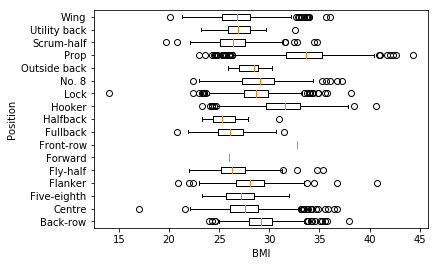

In [44]:
Y = []
labels = []
for group in grouped:
    labels.append(group[0])
    Y.append(group[1]['BMI'])
    
fig,ax = plt.subplots()
ax.boxplot(Y,labels=labels,vert=False)
plt.xlabel('BMI')
plt.ylabel('Position')
plt.show()

In [11]:
temp = new_data
temp = temp.sort_values('NewBMI', ascending=True)
temp.head()

,name,Born,Span,Position,Mat,Start,Sub,Pts,Tries,Conv,Pens,Drop,%,Height,Weight,BMI,NewBMI,diffBMI
6342,Taumei Hikila,"November 13, 1980",1.0,Lock,1.0,1.0,0.0,5.0,1.0,0.0,0.0,0.0,100.00,195.58,53.523900,13.992614,13.007086,-0.985529
1314,Gilbert Pierrot,"February 3, 1889, Bizanos",1.0,Centre,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,203.20,70.306817,17.027466,15.528572,-1.498894
5395,Pedro Fernandes,"December 12, 1973",8.0,Scrum-half,11.0,9.0,2.0,0.0,0.0,0.0,0.0,0.0,18.18,195.58,75.296333,19.684525,18.298103,-1.386422
4029,Pierre Edwards,"May 23, 1953, George",1.0,Fullback,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,100.00,198.12,81.646627,20.800875,19.211479,-1.589396
1666,Alain Porthault,"July 15, 1929, Vervins",3.0,Wing,7.0,7.0,0.0,9.0,3.0,0.0,0.0,0.0,71.42,180.34,65.317301,20.083717,19.442022,-0.641696


In [16]:
temp = new_data
temp = temp.sort_values('diffBMI', ascending=True)
temp.head()

,name,Born,Span,Position,Mat,Start,Sub,Pts,Tries,Conv,Pens,Drop,%,Height,Weight,BMI,NewBMI,diffBMI
3799,Richard Metcalfe,"November 21, 1973, Leeds",2.0,Lock,9.0,7.0,2.0,5.0,1.0,0.0,0.0,0.0,38.88,213.36,127.005864,27.899586,24.830452,-3.069135
560,Will Skelton,"May 3, 1992, Auckland",3.0,Lock,18.0,6.0,12.0,10.0,2.0,0.0,0.0,0.0,52.77,203.20,140.613635,34.054933,31.057145,-2.997788
2749,Franco Berni,"January 9, 1965, Alessandria",5.0,Lock,10.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,35.00,198.12,149.685482,38.134938,35.221045,-2.913893
904,Richard West,"March 20, 1971, Hereford",1.0,Lock,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,100.00,208.28,127.005864,29.277139,26.372312,-2.904827
6725,Siaosi Mahoni,"January 29, 1997, East Palo Alto, CA, United S...",1.0,Lock,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,100.00,203.20,133.809749,32.407113,29.554380,-2.852734


In [13]:
temp = new_data
temp = temp.sort_values('diffBMI', ascending=True)
temp.tail()

,name,Born,Span,Position,Mat,Start,Sub,Pts,Tries,Conv,Pens,Drop,%,Height,Weight,BMI,NewBMI,diffBMI
5463,Pedro Leal,"April 28, 1984, Lisboa",13.0,Scrum-half,76.0,60.0,16.0,265.0,5.0,45.0,50.0,0.0,38.81,160.02,75.749926,29.582419,30.401142,0.818723
5462,Pedro Leal,"April 28, 1984, Lisboa",13.0,Fullback,76.0,60.0,16.0,265.0,5.0,45.0,50.0,0.0,38.81,160.02,75.749926,29.582419,30.401142,0.818723
5011,Seru Vularika,"April 29, 1990",3.0,Scrum-half,11.0,5.0,6.0,0.0,0.0,0.0,0.0,0.0,63.63,160.02,80.739442,31.530961,32.403612,0.872651
5207,Riaan Jantjies,"June 23, 1965, Wellington",7.0,Scrum-half,16.0,13.0,3.0,0.0,0.0,0.0,0.0,0.0,68.75,157.48,62.595747,25.240271,26.147168,0.906897
6020,Ki Anufe,"April 12, 1987",5.0,Fly-half,6.0,4.0,2.0,40.0,0.0,8.0,8.0,0.0,83.33,154.94,84.821773,35.332978,36.901313,1.568335


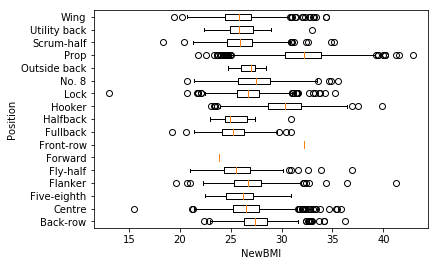

In [17]:
Y = []
labels = []
for group in grouped:
    labels.append(group[0])
    Y.append(group[1]['NewBMI'])
    
fig,ax = plt.subplots()
ax.boxplot(Y,labels=labels,vert=False)
plt.xlabel('NewBMI')
plt.ylabel('Position')
plt.show()

In [18]:
bmi_data = new_data[['BMI','NewBMI','diffBMI']]
bmi_data.describe()

,BMI,NewBMI,diffBMI
count,6742.000000,6742.000000,6742.000000
mean,28.657132,27.471335,-1.185797
std,3.270116,3.141629,0.604276
min,13.992614,13.007086,-3.069135
25%,26.310860,25.292706,-1.598157
50%,28.196742,26.857203,-1.175601
75%,30.409584,29.028018,-0.788751
max,44.351543,42.934464,1.568335
